# Correlation between Flare Production and AR Complexity

The purpose of this notebook is to find the correlation, if any exists, between Flare Production and AR Complexity.

***

## Imports

In [1]:
import copy
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, shapiro

import matplotlib.pyplot as plt
import seaborn as sns

# Loading the All Clear dataset

In [2]:
properties = pd.read_csv("data/all_clear/lookup_properties.csv", delimiter=';')
properties.set_index('#id', inplace=True)
rankings = pd.read_csv("data/all_clear/rankings.csv", delimiter=';')
rankings.set_index('image_id', inplace=True)
rankings.sort_index(inplace=True)

In [3]:
properties.head(10)

,filename,zooniverse_id,angle,area,areafrac,areathesh,bipolesep,c1flr24hr,id_filename,flux,...,hcpos_x,hcpos_y,m1flr12hr,m5flr12hr,n_nar,noaa,pxpos_x,pxpos_y,sszn,zurich
#id,,,,,,,,,,,,,,,,,,,,,
1,530be1183ae74079c300000d.jpg,ASZ000090y,37.8021,34400.0,0.12,2890.0,3.72,0,1,2.180000e+22,...,452.26991,443.92976,0,0,1,8809,229.19344,166.87700,1,bxo
2,530be1183ae74079c300000f.jpg,ASZ000090o,37.3590,78700.0,-0.00,6170.0,7.28,0,2,5.760000e+22,...,149.64301,621.53865,0,0,1,8810,200.41511,154.54088,2,fao
3,530be1183ae74079c3000011.jpg,ASZ0000946,58.6197,37900.0,0.08,937.0,3.88,0,3,2.150000e+22,...,704.04967,-436.33152,0,0,1,8812,205.30165,154.98689,3,axx
4,530be1183ae74079c3000013.jpg,ASZ000090v,32.3099,31200.0,0.12,1720.0,4.90,0,4,1.660000e+22,...,-449.47446,-234.01929,0,0,1,8813,207.95782,169.12196,4,dro
5,530be1183ae74079c3000015.jpg,ASZ000090x,49.9221,88400.0,0.05,6480.0,12.48,0,5,6.130000e+22,...,-735.40990,208.46232,0,0,2,8814,183.10649,165.00398,5,hax
6,530be1183ae74079c3000017.jpg,ASZ000090q,41.7276,66500.0,-0.04,5450.0,7.45,0,6,4.510000e+22,...,307.16437,621.26440,0,0,1,8810,200.89942,158.90942,6,fao
7,530be1183ae74079c3000019.jpg,ASZ000090w,21.4421,31300.0,0.05,1930.0,5.32,1,7,1.580000e+22,...,-232.85591,-226.07368,0,0,1,8813,202.77628,166.14022,7,dso
8,530be1183ae74079c300001b.jpg,ASZ000090p,30.3312,49700.0,0.28,2670.0,1.86,0,8,2.430000e+22,...,-464.25581,230.57762,0,0,1,8814,191.95662,171.67525,8,hhx
9,530be1183ae74079c300001d.jpg,ASZ00008tg,42.8451,33600.0,-0.20,3850.0,6.03,1,9,2.840000e+22,...,-649.56237,212.13884,0,0,1,8815,197.90666,174.86663,9,cro


In [4]:
rankings.head(10)

,#id,count,k_value,score,std_dev
image_id,,,,,
1,2779,50,8,1126.778324,1.707604
2,10010,50,8,1312.434736,2.397493
3,10,50,8,962.280235,1.945574
4,5718,50,8,1199.623395,1.894883
5,8599,50,8,1270.270911,1.207558
6,9385,50,8,1293.377418,1.454489
7,7288,50,8,1236.575624,2.318417
8,6152,50,8,1209.593634,1.790289
9,9607,50,8,1299.871029,3.015982


# Data Preparation
Making a new dataframe that holds information for any flare being produced and the associated AR complexity.

In [10]:
observed_columns = ['c1flr24hr', 'm1flr12hr', 'm5flr12hr', 'noaa']
flares_complexities = copy.deepcopy(properties[observed_columns])
flares_complexities['complexity'] = rankings.score

In [11]:
flares_complexities.head(10)

,c1flr24hr,m1flr12hr,m5flr12hr,noaa,complexity
#id,,,,,
1,0,0,0,8809,1126.778324
2,0,0,0,8810,1312.434736
3,0,0,0,8812,962.280235
4,0,0,0,8813,1199.623395
5,0,0,0,8814,1270.270911
6,0,0,0,8810,1293.377418
7,1,0,0,8813,1236.575624
8,0,0,0,8814,1209.593634
9,1,0,0,8815,1299.871029


In [12]:
def combine_flaring_columns(ar):
    ar['flares'] = ar.m5flr12hr | ar.m1flr12hr | ar.c1flr24hr
    ar.drop(['m5flr12hr', 'm1flr12hr', 'c1flr24hr'], axis=1, inplace=True)

In [13]:
combine_flaring_columns(flares_complexities)

In [14]:
flares_complexities.head(10)

,noaa,complexity,flares
#id,,,
1,8809,1126.778324,0
2,8810,1312.434736,0
3,8812,962.280235,0
4,8813,1199.623395,0
5,8814,1270.270911,0
6,8810,1293.377418,0
7,8813,1236.575624,1
8,8814,1209.593634,0
9,8815,1299.871029,1


#### Separating the positive and negative class

In [15]:
does_flare = flares_complexities[flares_complexities.flares == 1]
does_not_flare = flares_complexities[flares_complexities.flares == 0]

In [16]:
does_flare.head(10)

,noaa,complexity,flares
#id,,,
7,8813,1236.575624,1
9,8815,1299.871029,1
10,8810,1306.593595,1
14,8810,1300.302886,1
23,8816,1180.945863,1
32,8814,1369.772259,1
40,8829,1099.494215,1
41,8824,1349.701272,1
48,8829,1353.643280,1


In [17]:
does_not_flare.head(10)

,noaa,complexity,flares
#id,,,
1,8809,1126.778324,0
2,8810,1312.434736,0
3,8812,962.280235,0
4,8813,1199.623395,0
5,8814,1270.270911,0
6,8810,1293.377418,0
8,8814,1209.593634,0
11,8813,1243.681834,0
12,8814,1191.450319,0


***

# Point-Biserial Correlation
A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. It is a special case of Pearson’s product-moment correlation, which is applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale.

## Assumptions for using Point-Biserial Correlation

* **Assumption 1**: One of the two variables should be measured on a continuous scale. In this analysis, the `Complexity` is continuous.

* **Assumption 2**: The other variable should be dichotomous. In this analysis, whether an AR `flares` is dichotomous, **_0_** denoting no flaring, and **_1_** denoting flaring.

* **Assumption 3**: The continuous variable should have equal variances for each category of the dichotomous variable.

* **Assumption 4**: There should be no outliers for the continuous variable for each category of the dichotomous variable.

* **Assumption 5**: The continuous variable should be approximately normally distributed for each category of the dichotomous variable.



***

### For Assumption 3

In [18]:
does_flare.complexity.var()

8871.866873500114

In [19]:
does_not_flare.complexity.var()

10177.684638071736

#### This violates assumption 3.
To fix it, we normalize the complexities in each class.

In [20]:
does_flare['normalized_complexity'] = (does_flare.complexity - does_flare.complexity.mean()) / does_flare.complexity.std()
does_not_flare['normalized_complexity'] = (does_not_flare.complexity - does_not_flare.complexity.mean()) / does_not_flare.complexity.std()

/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
does_flare.head(10)

,noaa,complexity,flares,normalized_complexity
#id,,,,
7,8813,1236.575624,1,-0.927213
9,8815,1299.871029,1,-0.255221
10,8810,1306.593595,1,-0.183849
14,8810,1300.302886,1,-0.250636
23,8816,1180.945863,1,-1.517822
32,8814,1369.772259,1,0.486905
40,8829,1099.494215,1,-2.382575
41,8824,1349.701272,1,0.273816
48,8829,1353.643280,1,0.315667


In [22]:
does_not_flare.head(10)

,noaa,complexity,flares,normalized_complexity
#id,,,,
1,8809,1126.778324,0,-0.680140
2,8810,1312.434736,0,1.160147
3,8812,962.280235,0,-2.310698
4,8813,1199.623395,0,0.041924
5,8814,1270.270911,0,0.742205
6,8810,1293.377418,0,0.971244
8,8814,1209.593634,0,0.140752
11,8813,1243.681834,0,0.478646
12,8814,1191.450319,0,-0.039090


In [23]:
does_not_flare.normalized_complexity.var()

1.0

In [24]:
does_flare.normalized_complexity.var()

0.9999999999999967

#### This assumption 3 holds.
The continuous variable in both positive and negative has an equal variance.

****

#### Combining the positive and negative classes

In [25]:
all_flares = pd.concat([does_flare, does_not_flare])

In [26]:
all_flares.sample(frac=1).head(10)

,noaa,complexity,flares,normalized_complexity
#id,,,,
5303,9633,1157.219098,0,-0.378401
9895,10365,1293.949656,1,-0.318086
5891,9720,1243.332163,0,0.475180
11873,10689,1110.720580,0,-0.839309
9422,10294,1188.594520,0,-0.067398
11213,10582,1316.860455,0,1.204016
11436,10631,1003.567867,0,-1.901442
10686,10503,1045.660300,0,-1.484208
7970,10069,1422.144830,1,1.042933


***

### For Assumption 4

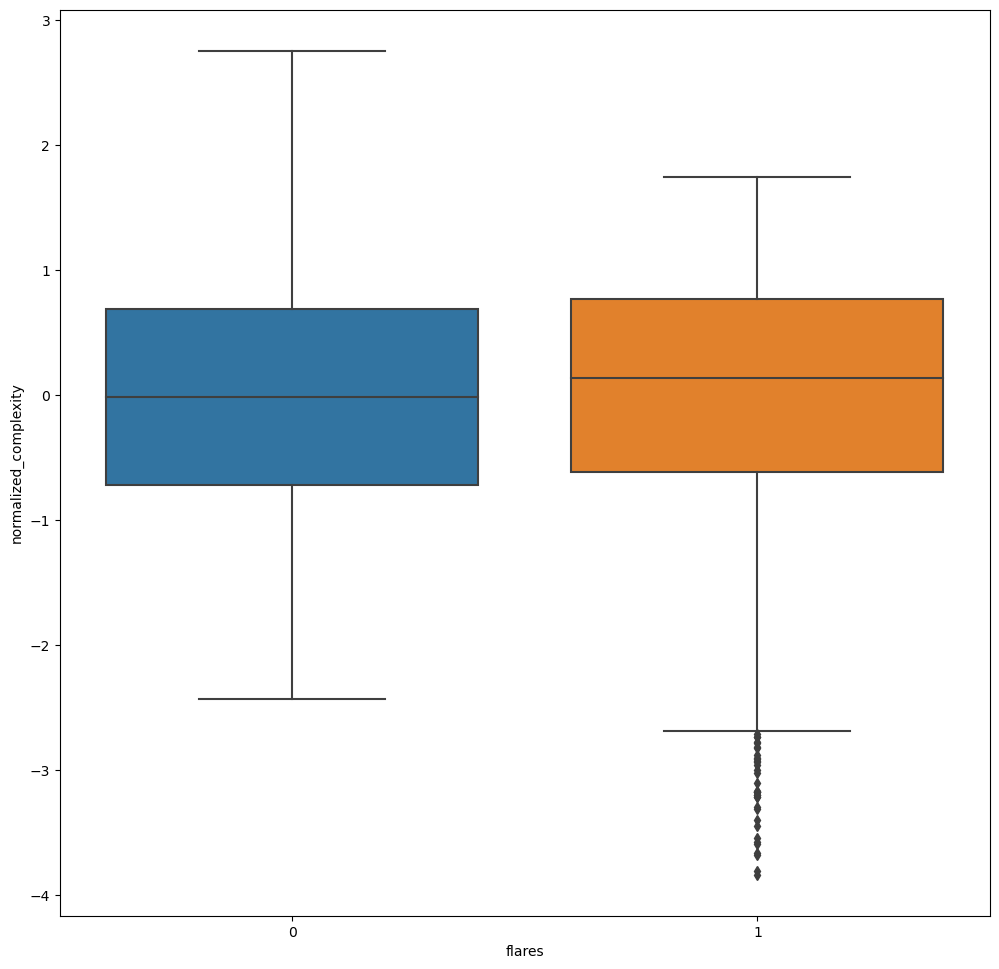

In [27]:
plt.figure(figsize=(12,12), dpi=100)
sns.boxplot(y=all_flares.normalized_complexity, x=all_flares.flares)
plt.show()

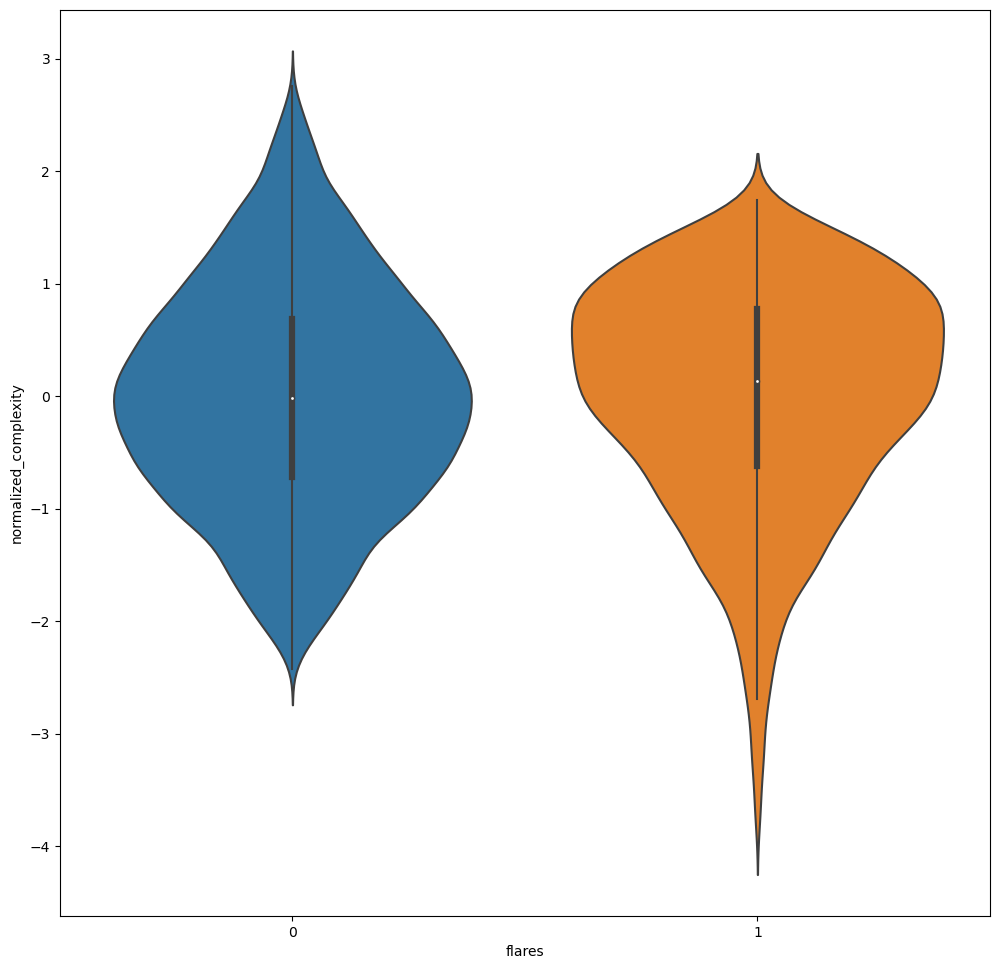

In [28]:
plt.figure(figsize=(12,12), dpi=100)
sns.violinplot(y=all_flares.normalized_complexity, x=all_flares.flares)
plt.show()

### There are some outliers for the positive class (Need help to deal with them)

***

### For Assumption 5

### Plotting the distribution of positive and negative classes

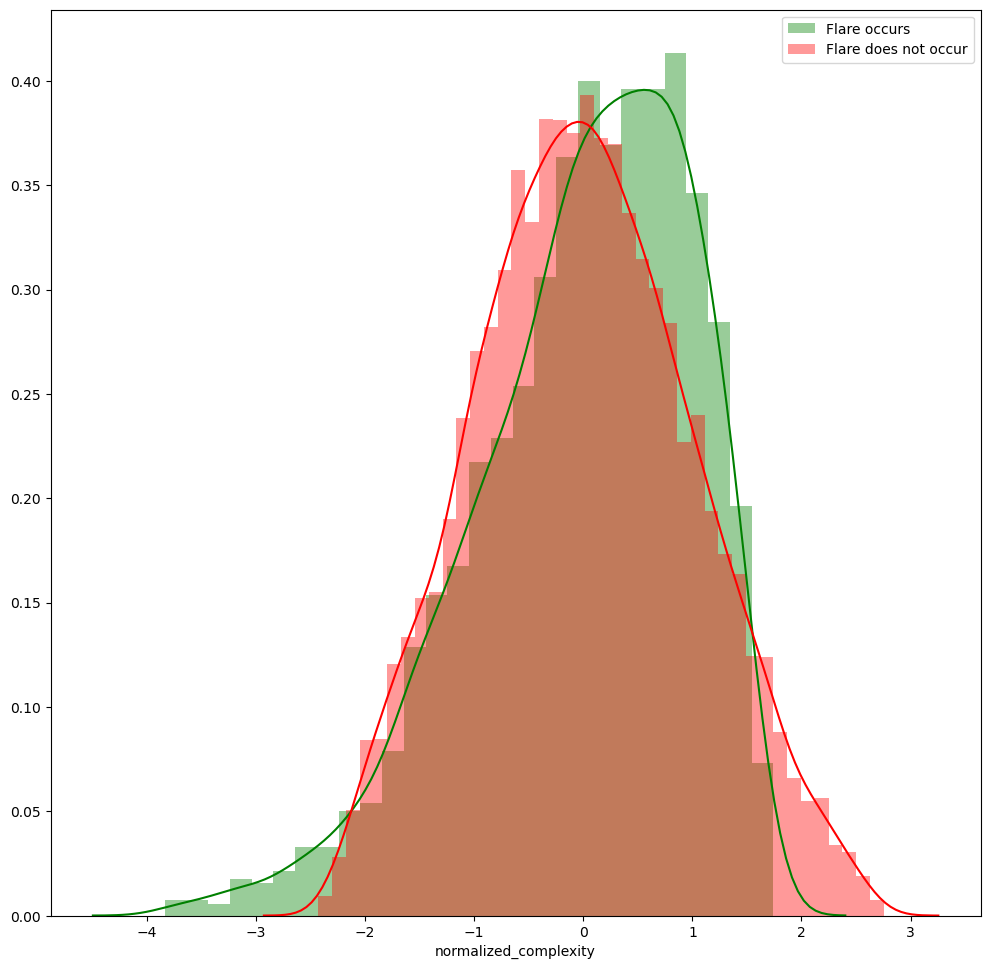

In [29]:
plt.figure(figsize=(12,12), dpi=100)
sns.distplot(does_flare.normalized_complexity, color='green')
sns.distplot(does_not_flare.normalized_complexity, color='red')
plt.legend(labels=['Flare occurs', 'Flare does not occur'])
plt.show()

### To test if distrbution can be assumed gaussian

## Shapiro-Wilks test for normality
The Shapiro-Wilks test for normality is used to detect all departures from normality.

The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05.  

Passing the normality test only indicates that no significant departure from normality was found.

In [30]:
statistic, p_value = shapiro(does_flare.complexity)
print(f"The p value for this test is {p_value}")

The p value for this test is 1.3814005237797574e-26


In [31]:
statistic, p_value = shapiro(does_not_flare.complexity)
print(f"The p value for this test is {p_value}")

The p value for this test is 8.128411264416912e-19


/home/apollo/anaconda3/envs/Andromeda/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Both distributions fail the Shapiro test. Need help to fix this.

***

# Point-Biserial Correlation


In [32]:
all_flares.sample(frac=1).head(10)

,noaa,complexity,flares,normalized_complexity
#id,,,,
6563,9843,1220.399971,0,0.247868
6020,9742,1419.844013,0,2.224822
1100,8989,1173.049559,0,-0.221484
9148,10260,1173.705775,0,-0.214980
5459,9667,1108.917613,0,-0.857181
11015,10551,1295.845707,0,0.995711
5546,9667,1098.840673,0,-0.957067
10197,10419,1118.331709,0,-0.763865
12343,10757,1144.248807,0,-0.506967


In [33]:
pointbiserialr(all_flares.flares, all_flares.complexity)

PointbiserialrResult(correlation=0.4596014988642637, pvalue=0.0)

#### The Point-Biserial Correlation shows a moderate positive correlation between AR complexity and Flare Production.